# King County, Seattle Housing - Attributes and Sale Prices (May 2014 & 2015)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style("white")

In [2]:
df = pd.read_csv("kc_house_data.csv")

print(df.head())
print(df.loc[:,'price':'waterfront'].describe())
a = df.zipcode.unique()
print(sorted(a))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

# Select an outcome variable
...and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

### Outcome Variable
- 'price'

### Two Categorical Variables
- 'waterfront'
- 'zipcode'

### Four Continous Variables
- 'living_space' = 'bedrooms', 'bathrooms' and 'sqft_living'
- 'yr_renovated'
- 'floors'
- 'yr_built'

### Are the prices of this data set normally distributed?

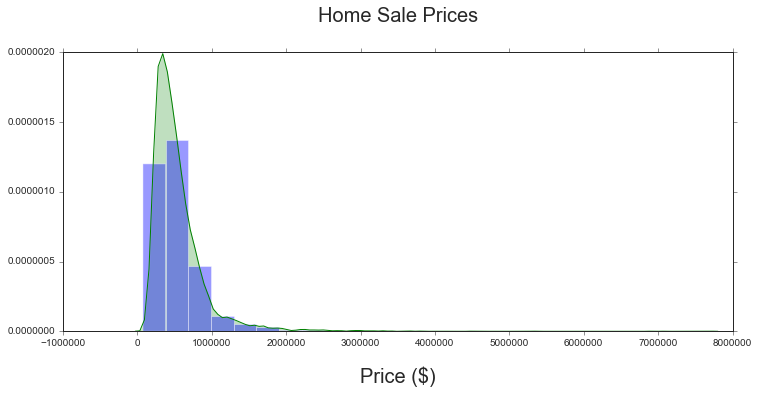

In [3]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
sns.set_style('ticks', {'xtick.major.size': 0.2})

g = plt.figure(figsize=(12,5))
plt.title('Home Sale Prices', y=1.09)

axes = sns.distplot(df['price'], hist=True, bins=25, color='b', 
                    kde_kws={'shade':True,'color':'g'})
plt.xlabel('Price ($)', labelpad=18)

Let's focus the data to only reflect waterfront property and afterward we can normalize the price data.

In [4]:
df_waterfront = df.loc[
    (df['waterfront'] == 1),
    ['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']
]

In [5]:
# creating a features dataframe

features = df_waterfront[['price']]

In [6]:
print(len(df_waterfront.index))
print(len(features.index))

163
163


Are there any outliers in our prices?

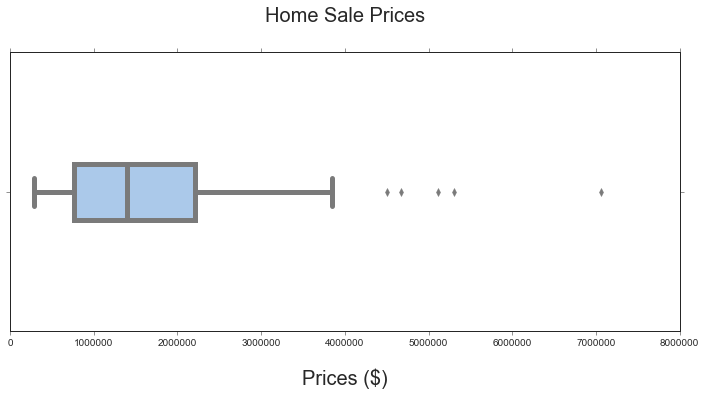

In [7]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.boxplot(y=df_waterfront['price'], linewidth=5, width=0.2, palette='pastel', orient='h')

plt.xlabel('Prices ($)', labelpad=20)
plt.title('Home Sale Prices', y=1.09)

There are obviously outliers (including an extreme outlier) at the top end of housing price. If we remove these, perhaps we can get a more normal distribution of the data. 

In [8]:
# Keeping data frames consistent for plotting purposes

df_waterfront = df_waterfront[df_waterfront['price'] < 4000000]
features = features[features['price'] < 4000000]

print(len(df_waterfront.index))
print(len(features.index))

158
158


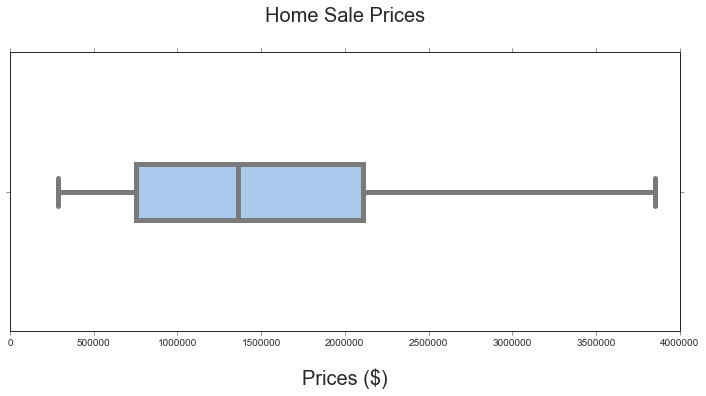

In [9]:
# deleting price outliers

df_waterfront = df_waterfront[df_waterfront['price'] < 4000000]
df_waterfront = df_waterfront
features['price'] = df_waterfront['price']

sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.boxplot(y=features['price'], linewidth=5, width=0.2, palette='pastel', orient='h')

plt.xlabel('Prices ($)', labelpad=20)
plt.title('Home Sale Prices', y=1.09)

Let's look now at the normality of the prices...

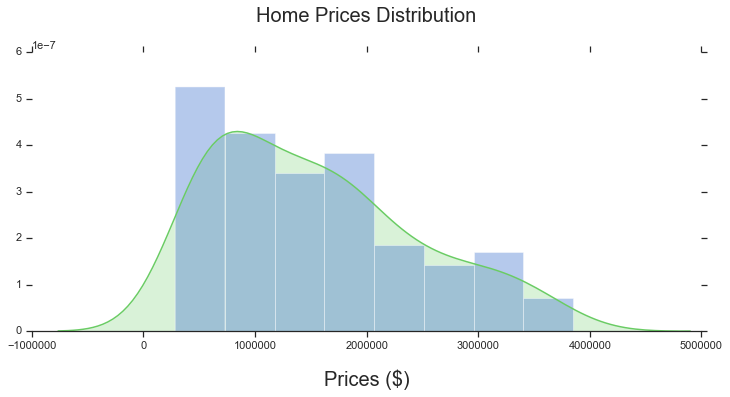

In [10]:
sns.set(style='white', palette='muted', color_codes=True)
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
sns.set_style('ticks', {'xtick.major.size': 0.2})

g = plt.figure(figsize=(12,5))
plt.title('Home Prices Distribution', y=1.09)

axes = sns.distplot(features['price'].dropna(), hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.xlabel('Prices ($)', labelpad=18)

sns.despine(left=True)

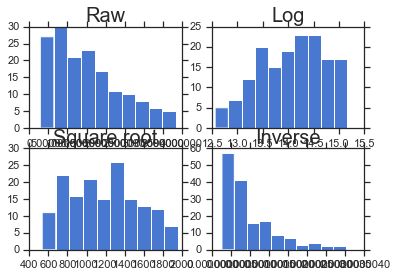

In [11]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(features['price'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(features['price'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(features['price'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/features['price'].dropna())
plt.title('Inverse')
plt.show()

# The log transformation, while skewed right, is closest to normal. But let's
# make a feature from this log one.

features['log_price'] = np.log(features['price'])

Let's compare years, first by converting dates to datetime...

In [12]:
features['date_clean'] = df_waterfront['date'].str.replace('T000000', '')
features['date_clean'] = pd.to_datetime(features['date_clean']).sort_values(ascending=True)

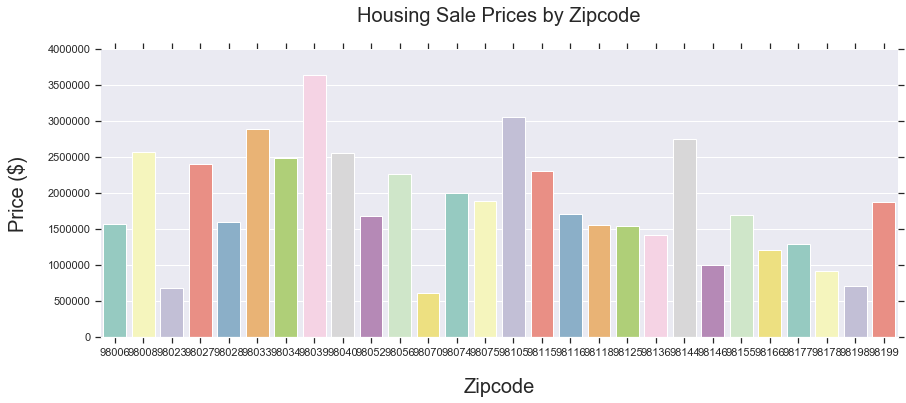

In [13]:
# looking at price by zip code

sns.set()
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

ax = sns.catplot(x='zipcode', y='price', data=df_waterfront, aspect=2.5, kind='bar', palette='Set3', ci=None, dodge=False)
ax.despine(left=True)
ax.set_ylabels('Price')

plt.title('Housing Sale Prices by Zipcode', y=1.08)
plt.xlabel('Zipcode', labelpad=20)
plt.ylabel('Price ($)', labelpad=20)

Let's categorize the expense of each zipcode. 

In [14]:
# creating column categorizing zipcode housing prices

features['zipcode_prices'] = 1
features.loc[(features['price'] > 1000000) & (features['price'] <= 1600000), 'zipcode_prices'] = 2
features.loc[(features['price'] > 1600000) & (features['price'] <= 2000000), 'zipcode_prices'] = 3
features.loc[(features['price'] > 2000000) & (features['price'] <= 2500000), 'zipcode_prices'] = 4
features.loc[(features['price'] > 2500000), 'zipcode_prices'] = 5

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.444868   0.652409     0.824494 -0.073460  0.288376   
bedrooms       0.444868  1.000000   0.546857     0.515192 -0.029875  0.218384   
bathrooms      0.652409  0.546857   1.000000     0.724158  0.001348  0.474931   
sqft_living    0.824494  0.515192   0.724158     1.000000  0.012409  0.322177   
sqft_lot      -0.073460 -0.029875   0.001348     0.012409  1.000000 -0.154210   
floors         0.288376  0.218384   0.474931     0.322177 -0.154210  1.000000   
grade          0.737392  0.343865   0.647641     0.781520 -0.049175  0.432565   
sqft_above     0.725678  0.462319   0.685011     0.847110  0.014135  0.557470   
sqft_basement  0.435974  0.258814   0.309851     0.579450  0.001632 -0.249714   
yr_built       0.407092  0.146979   0.443543     0.441305 -0.077985  0.395369   
yr_renovated  -0.106497 -0.037977  -0.002735    -0.080540 -0.017553  0.040619   
zipcode       -0.390749 -0.0

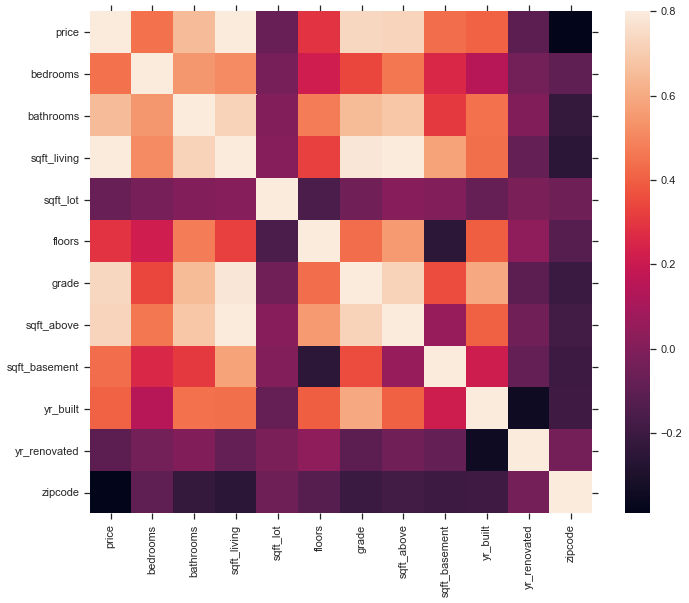

In [15]:
corrmat = df_waterfront.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Bedrooms, Bathrooms and Squarefoot living space appear to be highly correlated. Each value describes living space. Perhaps we can normalize them to the same scale and combine them into a "living space" feature.

In [16]:
features['living_space'] = df_waterfront['bedrooms'] * df_waterfront['bathrooms'] * df_waterfront['sqft_living']

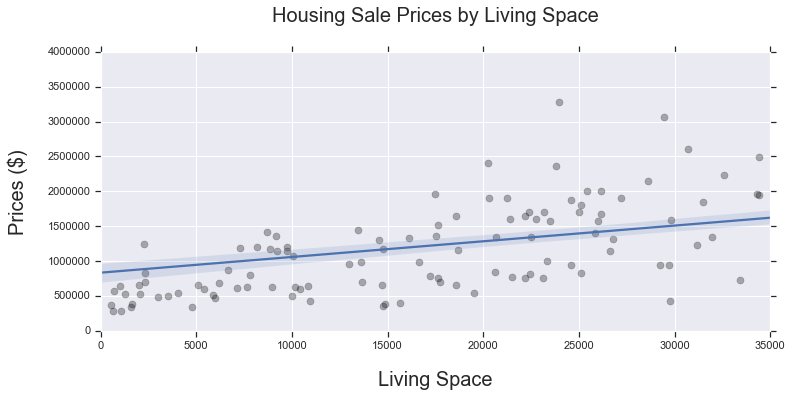

In [17]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.regplot(x=features['living_space'], y=features['price'], fit_reg=True,
            scatter_kws={'color':'black','alpha':0.3,'s':50})

plt.xlim(0, 35000)
plt.ylim(0, 4000000)
plt.xlabel('Living Space', labelpad=20)
plt.ylabel('Prices ($)', labelpad=20)
plt.title('Housing Sale Prices by Living Space', y=1.09)

Let's create a feature categorizing renovated homes. 

In [18]:
features['renovated'] = np.where((df_waterfront['yr_renovated'] != 0), 1, 0)

How have renovations affected price?

In [19]:
print(features[features['renovated'] == 1]['price'].describe())
print(features[features['renovated'] == 0]['price'].describe())

print(stats.ttest_ind(
   features[features['renovated'] == 1]['price'],
   features[features['renovated'] == 0]['price']))

count    4.000000e+01
mean     1.379629e+06
std      7.818028e+05
min      4.000000e+05
25%      7.637500e+05
50%      1.207500e+06
75%      1.812500e+06
max      3.600000e+06
Name: price, dtype: float64
count    1.180000e+02
mean     1.602198e+06
std      9.451361e+05
min      2.850000e+05
25%      7.500000e+05
50%      1.543500e+06
75%      2.230000e+06
max      3.850000e+06
Name: price, dtype: float64
Ttest_indResult(statistic=-1.3411248206760198, pvalue=0.1818292792567357)


What about the year that a house was built?

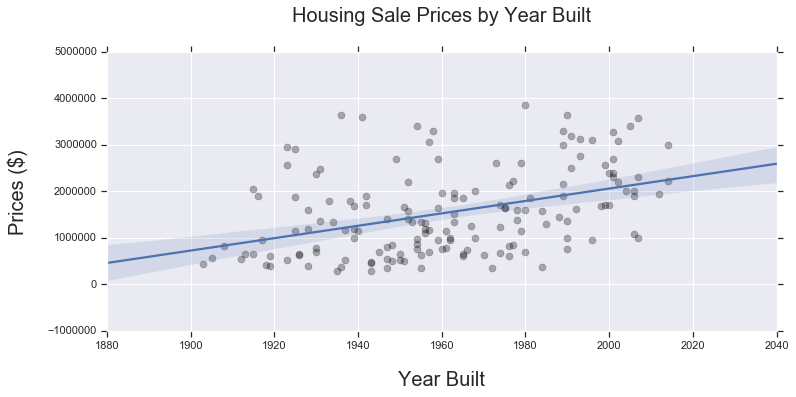

In [20]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.regplot(x=df_waterfront['yr_built'], y=df_waterfront['price'], fit_reg=True,
            scatter_kws={'color':'black','alpha':0.3,'s':50})

# plt.xlim(0, 35000)
# plt.ylim(0, 4000000)
plt.xlabel('Year Built', labelpad=20)
plt.ylabel('Prices ($)', labelpad=20)
plt.title('Housing Sale Prices by Year Built', y=1.09)

Now let's create features for renovation year and the year a home was built that reflects the range of influence on price (aka the range of expense).

In [21]:
features['year_built_premium'] = 1
features.loc[(df_waterfront['yr_built'] > 1900) & (df_waterfront['yr_built'] <= 1920), 'year_built_premium'] = 2
features.loc[(df_waterfront['yr_built'] > 1920) & (df_waterfront['yr_built'] <= 1940), 'year_built_premium'] = 3
features.loc[(df_waterfront['yr_built'] > 1940) & (df_waterfront['yr_built'] <= 1960), 'year_built_premium'] = 4
features.loc[(df_waterfront['yr_built'] > 1960) & (df_waterfront['yr_built'] <= 1980), 'year_built_premium'] = 5
features.loc[(df_waterfront['yr_built'] > 1980) & (df_waterfront['yr_built'] <= 1990), 'year_built_premium'] = 6
features.loc[(df_waterfront['yr_built'] > 2000), 'year_built_premium'] = 7

Lastly, let's look at the price over years...

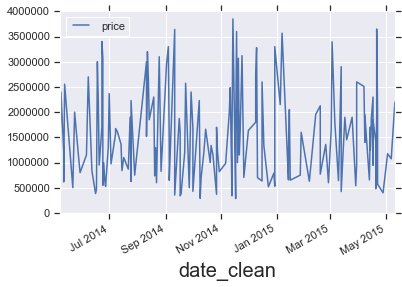

In [22]:
features[['date_clean','price']].set_index('date_clean').plot()

Let's try that again with the change in price..

In [23]:
features['Cumsum'] = features.sort_values(by=['date_clean'])['price'].cumsum()

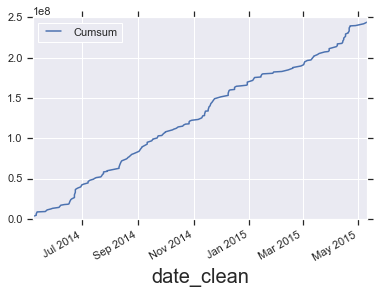

In [24]:
features[['date_clean','Cumsum']].set_index('date_clean').plot()

In [25]:
print(features.sort_values(by=['date_clean'])['price'].cumsum().tail())

18597    239394492.0
8277     239794492.0
1417     240969492.0
8978     242044492.0
1361     244244492.0
Name: price, dtype: float64


Cumulative prices appear to increase somewhat consistantly. What we can say, however, is that the greatest price increases appear to occur at the middle (July) and end (December) of each year. 

# Create eight new features.

In [26]:
features.head()

,price,log_price,date_clean,zipcode_prices,living_space,renovated,year_built_premium,Cumsum
49,1350000.0,14.115615,2015-03-11,2,20647.5,0,4,198533542.0
230,655000.0,13.392391,2015-04-13,1,5075.0,1,2,217726542.0
246,2400000.0,14.690979,2014-09-29,4,36500.0,0,1,105918050.0
264,369900.0,12.820988,2014-10-27,1,570.0,0,3,117963542.0
300,3075000.0,14.938815,2014-06-24,5,91000.0,0,7,33044000.0


# Use filtering methods to select the five best features and justify your choices.
The five best features will be scored along a range from 1 to 5.
+ The feature most correlated with the outcome variable (price) appears to be "living_space": 5
- The "zipcode_prices" of these homes is the second most influential feature: 4
- The "year_built_premium" is obviously a very influential feature: 3
- The fact that a home was "renovated" appears to add clear value: 2
- The cumulative sum ("Cumsum") of housing prices over time tells us the base level increase in price: 1